## Task about lakes

In [27]:
import numpy as np 
import matplotlib.pyplot as plt

array([88, 26, 71, 56, 34, 93,  4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70,
       89,  4, 59])

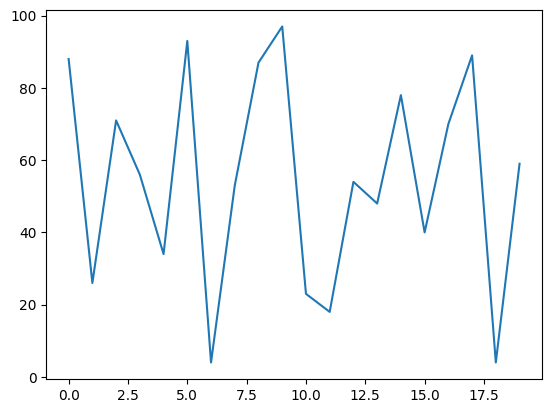

In [28]:
np.random.seed(2023)
a = np.random.randint(1,100,20)
plt.plot(a)
a

Search for lakes

In [39]:
bottoms = [a[i+1] for i in range (len(a[2:])) if a[i] > a[i+1] and a[i+1]<a[i+2]]
peacks = [a[i+1] if a[i] < a[i+1] and a[i+1]>a[i+2] else (a[i] if i == 0 and a[i]>a[i+1] else (a[i+2] if i+2 == len(a)-1 and a[i+2]>a[i+1] else ' ')) for i in range (len(a[2:]))]
edges = [a[i] for i in range(len(a)) if a[i] in peacks or a[i] in bottoms]
print('Bottoms: ',bottoms)
print('Peacks: ',peacks)
print('Peacks: ',edges)

Bottoms:  [26, 34, 4, 18, 48, 40, 4]
Peacks:  [88, 71, ' ', ' ', 93, ' ', ' ', ' ', 97, ' ', ' ', 54, ' ', 78, ' ', ' ', 89, 59]
Peacks:  [88, 26, 71, 34, 93, 4, 97, 18, 54, 48, 78, 40, 89, 4, 59]


In [40]:
lakes = []
lakes_indxs = []
lake = []
lake_indx = []
peack = np.max(a)
peack_index = np.where(a == peack)[0]

for i in range(len(a)):

    if not lake:
        lake.append(a[i])
        lake_indx.append(i)
    elif a[i] in edges and ((i!=lake_indx[0]+1) and (a[i]>lake[0] or (a[i]==np.max(a[lake_indx[0]+1:len(a)]) and a[lake_indx[0]+1]))):
        lake.append(a[i])
        lake_indx.append(i)
        lakes.append(lake.copy())
        lakes_indxs.append(lake_indx.copy())
        lake.pop(0)
        lake_indx.pop(0)
    
print('The values of shores: ',lakes)
print('The values of shores indexes: ',lakes_indxs)

The values of shores:  [[88, 93], [93, 97], [97, 89], [89, 59]]
The values of shores indexes:  [[0, 5], [5, 9], [9, 17], [17, 19]]


Search for the deepest lake

In [41]:
depth = 0
for i in lakes_indxs:
    if a[np.min(i)]-np.min(a[i[0]:i[1]]) > depth:
        depth = a[np.min(i)]-np.min(a[i[0]:i[1]])
        deepest_lake = i
print('Shores indexes of the deepest lake: ',deepest_lake)

Shores indexes of the deepest lake:  [5, 9]


The deepest lake visualization

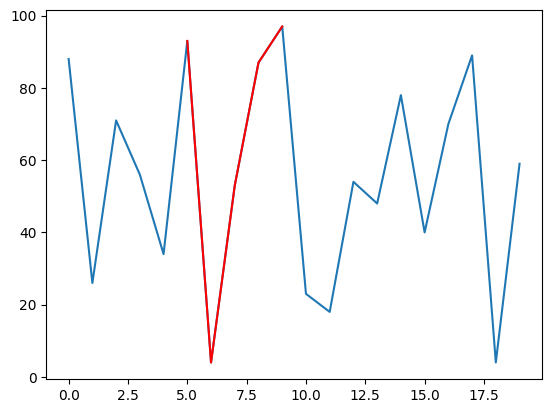

In [42]:
plt.plot (a)
x = range(deepest_lake[0],deepest_lake[1]+1)
y = a[deepest_lake[0]:deepest_lake[1]+1]
plt.plot (x,y, c='red');